# Comparing Classification Models for Wine Quality Prediction

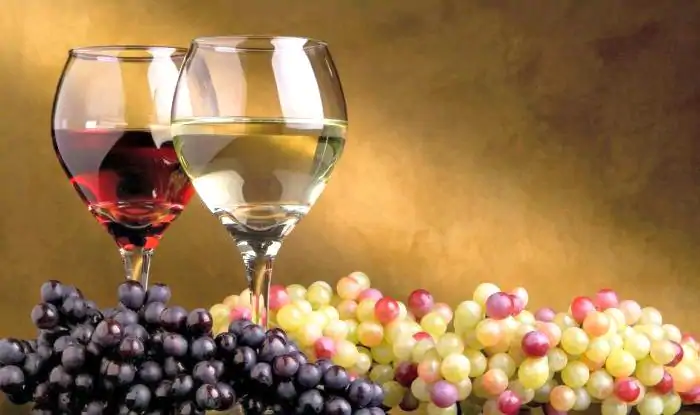

# Importing Libraries and Modules

In [8]:
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

# Reading the Data

In [9]:
df = pd.read_csv('winequality-red.csv')

# Comprehending the Data

In [10]:
print(df.shape)
df.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Checking missing values

In [11]:
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [12]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [13]:
df.dtypes


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [14]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


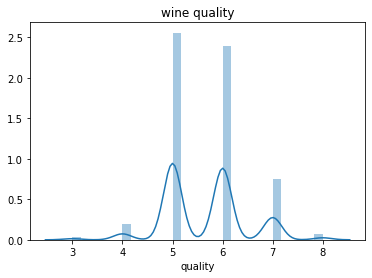

In [16]:
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt

sn.distplot(df["quality"])
plt.title("wine quality")
plt.show()

Considering the dependent variable’s transformation, I found out that our data is normally distributed.

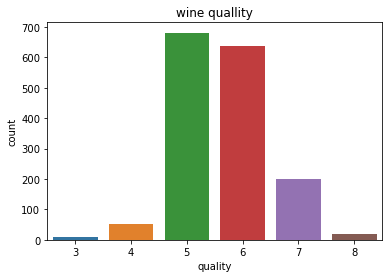

In [17]:
sn.countplot(df["quality"])
plt.title("wine quallity")
plt.show()

# Detecting outliers

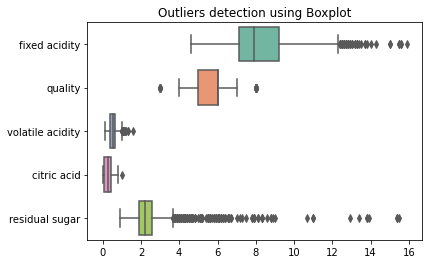

In [19]:
sn.boxplot(data=df[["fixed acidity","quality","volatile acidity","citric acid","residual sugar"]], orient="h", palette="Set2")
plt.title("Outliers detection using Boxplot")
plt.show()

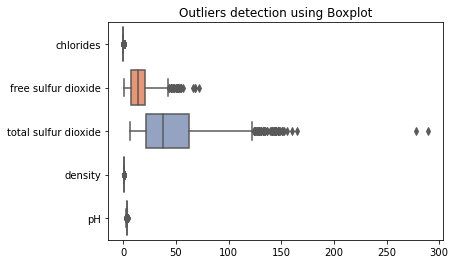

In [20]:
sn.boxplot(data=df[["chlorides","free sulfur dioxide","total sulfur dioxide","density","pH"]], orient="h", palette="Set2")
plt.title("Outliers detection using Boxplot")
plt.show()

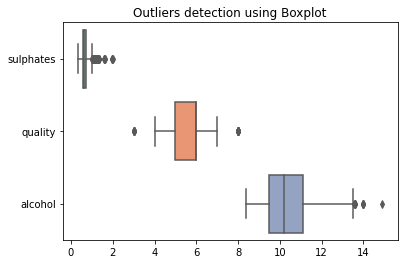

In [21]:
sn.boxplot(data=df[["sulphates","quality","alcohol"]], orient="h", palette="Set2")
plt.title("Outliers detection using Boxplot")
plt.show()

There are outliers in dataset.

First, there are positive relationships between quality and critic.acid, alcohol, and sulphates. Second, there are negative relationships between quality and volatile.acidity, density, and pH. Last, these independent variables show no significant relationship with quality: residual.sugar, chlorides, and total.sulfur.dioxide.

# Eliminating outliers by using Z-score

In [22]:
z = np.abs(stats.zscore(df))
df = df[(z < 3).all(axis=1)]
df.shape

(1451, 12)

# Checking the correlation between attributes

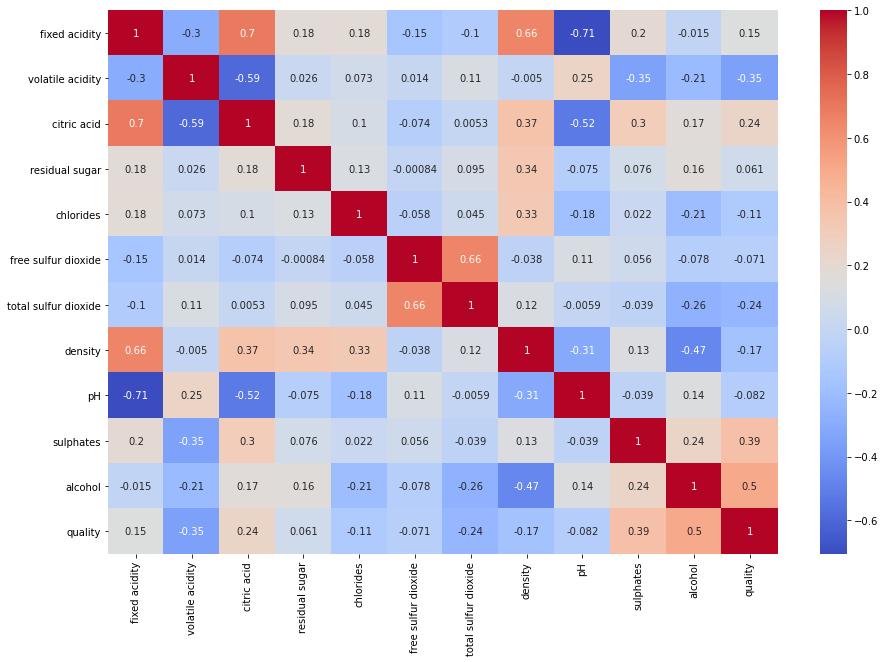

In [23]:
plt.subplots(figsize=(15, 10))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

When I checked the correlation between columns I can see that some of the features are strongly correlated with quality while some of them are not.

# Checking the class imbalance

In [24]:
df['quality'].value_counts()

5    617
6    586
7    185
4     47
8     16
Name: quality, dtype: int64

As a last step of exploratory data analysis I wanted to check the class imbalance. And it seems like there is a high class imbalance where the minority classes are less represented than the majority classes. This will be a crucial part of the modeling in the later steps.

# Data Preprocessing

In [25]:
# Define features X
X = np.asarray(df.iloc[:,:-1])
# Define target y
y = np.asarray(df['quality'])

# Standardizing the dataset

In [26]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# Train and test sets split

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (1160, 11) (1160,)
Test set: (291, 11) (291,)


# Validation and Model Selection

# KNN accuracy plot

Text(0, 0.5, 'Cross-validated accuracy')

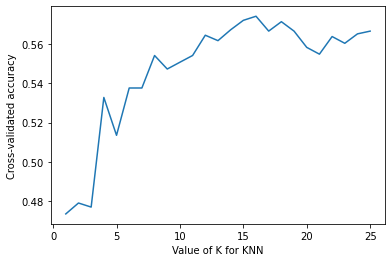

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
# Number of k from 1 to 26
k_range = range(1, 26)
k_scores = []
# Calculate cross validation score for every k number from 1 to 26
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # It’s 10 fold cross validation with ‘accuracy’ scoring 
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy') 
    k_scores.append(scores.mean())
%matplotlib inline
# Plot accuracy for every k number between 1 and 26
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

I decided to go with k=19 since one of the highest accuracy obtained with it. And trained the model and calculated the accuracy with different validation methods.

# Cross Validation for KNN

In [34]:
# Train the model and predict for k=19
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# classification report for test set
print(metrics.classification_report(y_test, y_pred, digits=3, zero_division = 1))

# Calculate cv score with 'accuracy' scoring and 10 folds
accuracy = cross_val_score(knn, X, y, scoring = 'accuracy',cv=10)
print('cross validation score',accuracy.mean())

# Calculate cv score with 'roc_auc_ovr' scoring and 10 folds
accuracy = cross_val_score(knn, X, y, scoring = 'roc_auc_ovr',cv=10)
print('cross validation score with roc_auc',accuracy.mean())

# Calculate roc_auc score with multiclass parameter
print('roc_auc_score',roc_auc_score(y_test,knn.predict_proba(X_test), multi_class='ovr'))

              precision    recall  f1-score   support

           4      1.000     0.000     0.000        11
           5      0.611     0.684     0.645       117
           6      0.522     0.574     0.547       122
           7      0.462     0.324     0.381        37
           8      1.000     0.000     0.000         4

    accuracy                          0.557       291
   macro avg      0.719     0.316     0.315       291
weighted avg      0.575     0.557     0.537       291

cross validation score 0.5665658951346245
cross validation score with roc_auc 0.7017253780930435
roc_auc_score 0.7435990826127948


When I look at the classification report I immediately see that classes 4 and 8 have not been taken into consideration when training because their recall results are zero. This means, of all class 4 and class 8 members, it did not predict any of them correctly. So, it wouldn’t be a good model for our dataset.

In [35]:
# import module
from sklearn.linear_model import LogisticRegression

# Train and fit model
logreg = LogisticRegression(multi_class='multinomial',solver ='newton-cg')

logreg.fit(X_train, y_train)

# Predict out-of-sample test set
y_pred = logreg.predict(X_test)

# classification report
print(metrics.classification_report(y_test, y_pred, digits=3, zero_division = 1))
print('accuracy',accuracy_score(y_test, y_pred))

# Calculate cv score with ‘roc_auc_ovr’ scoring and 10 folds
accuracy = cross_val_score(logreg, X, y, scoring = 'roc_auc_ovr',cv=10)
print('cross validation score with roc_auc',accuracy.mean())

# Calculate roc_auc score with multiclass parameter
print('roc_auc_score',roc_auc_score(y_test,logreg.predict_proba(X_test), multi_class='ovr'))

              precision    recall  f1-score   support

           4      1.000     0.000     0.000        11
           5      0.615     0.709     0.659       117
           6      0.566     0.598     0.582       122
           7      0.556     0.405     0.469        37
           8      1.000     0.000     0.000         4

    accuracy                          0.588       291
   macro avg      0.747     0.343     0.342       291
weighted avg      0.607     0.588     0.568       291

accuracy 0.5876288659793815
cross validation score with roc_auc 0.7984175315308614
roc_auc_score 0.7795082629665615


Even though cross validation scores are a little bit higher, Some of the recall results are still zero. Let’s see what happens if we add some polynomial features.

# Adding polynomial features to the logistic regression

In [38]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
# Add polynomial features to the logistic regression model
def PolynomialRegression(degree=2, **kwargs):
     return make_pipeline(PolynomialFeatures(degree),
     LogisticRegression(multi_class='multinomial',solver ='newton-cg', **kwargs))

In [39]:
# Train and fit the 3rd degree polynomial regression model
poly = PolynomialRegression(3)
poly.fit(X_train,y_train)

# Test out-of-sample test set
y_pred = poly.predict(X_test)

# Classification report
print(metrics.classification_report(y_test, y_pred, digits=3))

# Calculate cv score with 'roc_auc_ovr' scoring and 10 folds
accuracy = cross_val_score(poly, X, y, scoring = 'roc_auc_ovr',cv=10)
print('cross validation score with roc_auc_ovr scoring',accuracy.mean())

# Calculate roc_auc score with multiclass parameter
print('roc_auc_score',roc_auc_score(y_test,poly.predict_proba(X_test), multi_class='ovr'))

              precision    recall  f1-score   support

           4      0.167     0.182     0.174        11
           5      0.685     0.650     0.667       117
           6      0.624     0.680     0.651       122
           7      0.656     0.568     0.609        37
           8      0.333     0.250     0.286         4

    accuracy                          0.629       291
   macro avg      0.493     0.466     0.477       291
weighted avg      0.631     0.629     0.629       291

cross validation score with roc_auc_ovr scoring 0.6377119593508278
roc_auc_score 0.7005242323750944


Finally, I had some representation for minority classes when predicting but they are very low and also cross validation score is lower than before.

# Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
# Train and fit the Decision Tree Classification model
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

# Evaluate the model with out-of-sample test set
y_pred = tree.predict(X_test)

# Classification report
print(metrics.classification_report(y_test, y_pred.round(), digits=3))

# Calculate cv score with ‘roc_auc_ovr’ scoring and 10 folds
accuracy = cross_val_score(tree, X, y,scoring = 'roc_auc_ovr',cv=10)
print('cross validation score with roc_auc_ovr scoring',accuracy.mean())

# Calculate roc_auc score with multiclass parameter
print('roc_auc_score',roc_auc_score(y_test,tree.predict_proba(X_test), multi_class='ovr'))

              precision    recall  f1-score   support

           4      0.200     0.091     0.125        11
           5      0.699     0.675     0.687       117
           6      0.632     0.648     0.640       122
           7      0.467     0.568     0.512        37
           8      0.333     0.250     0.286         4

    accuracy                          0.622       291
   macro avg      0.466     0.446     0.450       291
weighted avg      0.618     0.622     0.618       291

cross validation score with roc_auc_ovr scoring 0.5843940487030195
roc_auc_score 0.6647897124956815


# Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

# Train and fit the Random Forest Classification model
forest = RandomForestClassifier(n_estimators=100,random_state = 0)
forest.fit(X_train, y_train)

# Test out-of-sample test set
y_pred = forest.predict(X_test)

# Classification report
print(metrics.classification_report(y_test, y_pred.round(), digits=3))

# Calculate cv score with 'roc_auc_ovr' scoring and 10 folds
accuracy = cross_val_score(forest, X, y,scoring = 'roc_auc_ovr',cv=10)
print('cross validation score with roc_auc_ovr scoring',accuracy.mean())

# Calculate roc_auc score with multiclass parameter
print('roc_auc_score',roc_auc_score(y_test,forest.predict_proba(X_test), multi_class='ovr'))

              precision    recall  f1-score   support

           4      0.000     0.000     0.000        11
           5      0.711     0.821     0.762       117
           6      0.690     0.713     0.702       122
           7      0.793     0.622     0.697        37
           8      1.000     0.250     0.400         4

    accuracy                          0.711       291
   macro avg      0.639     0.481     0.512       291
weighted avg      0.690     0.711     0.695       291

cross validation score with roc_auc_ovr scoring 0.7617443587644102
roc_auc_score 0.8332575905203725


It’s the best so far! The roc_auc_score is pretty good, the cross-validation score is the best so far and there are some recall results even for the minority classes.

# Conclusion

In this project, I used K-Nearest Neighbors, Logistic Regression with polynomial features, Decision Tree, and Random Forest. With the roc_auc_score in Scikit-learn I calculated the AUC score for each model. Also using cross_val_score method I found AUC score using cross validation method by passing roc_auc_ovr parameter. Even though it's usually used for performance evaluation in binary classification, with the One-vs-Rest approach, I applied it to the multi-class classification problem. Evaluating the model with this method is advantageous when there is a high class imbalance. Also it does not require to set a classification threshold.

Thank you.